In [132]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

## DATA:

In [2]:
!curl https://serv.cusp.nyu.edu/~fbianco/PUIdata/WorldFirearmsMurdersAndOwnership.csv > ms.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  39600      0 --:--:-- --:--:-- --:--:-- 39656


In [13]:
!curl http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv > pop.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79715  100 79715    0     0   338k      0 --:--:-- --:--:-- --:--:--  338k


In [32]:
!curl http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv > gdp.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  113k  100  113k    0     0   416k      0 --:--:-- --:--:-- --:--:--  418k


In [3]:
# ove the downloaded data to PUI data
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/ys3226/PUIdata


In [4]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ys3226/PUIDATA


In [5]:
# move the data
!mv ms.csv $PUIDATA

In [14]:
# unpacking into $PUIDATA
!unzip pop.zip -d $PUIDATA

Archive:  pop.zip
  inflating: /nfshome/ys3226/PUIDATA/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: /nfshome/ys3226/PUIDATA/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: /nfshome/ys3226/PUIDATA/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  


In [33]:
# unpacking into $PUIDATA
!unzip gdp.zip -d $PUIDATA

Archive:  gdp.zip
  inflating: /nfshome/ys3226/PUIDATA/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/ys3226/PUIDATA/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/ys3226/PUIDATA/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  


In [57]:
ms = pd.read_csv("%s/ms.csv"%os.getenv("PUIDATA"))

In [58]:
ms.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [59]:
pop = pd.read_csv("%s/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv"%os.getenv("PUIDATA"), 
                  skiprows=3)

In [60]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [61]:
pop = pop[['Country Name', '2017']]

In [62]:
gdp = pd.read_csv("%s/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv"%os.getenv("PUIDATA"), 
                  skiprows=3)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [63]:
gdp = gdp[['Country Name', '2017']]

In [64]:
data = {'Country':['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany',
                   'Greece', 'Holland', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Luxembourg',
                   'New Zealand', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland',
                   'United Kingdom', 'United States'],
        'Number of mass shootings':[4,1,2,4,0,2,6,7,0,2,0,0,0,0,0,0,3,1,0,1,1,2,2,3,78]}
ms_2 = pd.DataFrame(data)
ms_2.head()

,Country,Number of mass shootings
0,Australia,4
1,Austria,1
2,Belgium,2
3,Canada,4
4,Denmark,0


In [65]:
df_ = ms.merge(pop, right_on="Country Name", left_on="Country/Territory")
df_ = df_.merge(gdp, right_on="Country Name", left_on="Country/Territory")
df_ = df_.merge(ms_2, right_on="Country", left_on="Country/Territory")
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name_x,2017_x,Country Name_y,2017_y,Country,Number of mass shootings
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,24598933.0,Australia,1.323421e+12,Australia,4
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,8809212.0,Austria,4.165957e+11,Austria,1
2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,Belgium,11372068.0,Belgium,4.926813e+11,Belgium,2
3,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,36708083.0,Canada,1.653043e+12,Canada,4
4,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,5769603.0,Denmark,3.248720e+11,Denmark,0


In [66]:
df = df_[['Country/Territory', 'Average total all civilian firearms', '2017_x', 
          '2017_y', 'Number of homicides by firearm', 'Average firearms per 100 people',
          'Number of mass shootings']]

In [67]:
df = df.rename(index=str, columns={"Country/Territory": "Country Name",
                                      "2017_x": "pop",
                                      "2017_y": "gdp",
                                      "Average firearms per 100 people" : "Guns/100 inhabitants"})

In [68]:
df.head()

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,24598933.0,1.323421e+12,30.0,15.0,4
1,Austria,2500000.0,8809212.0,4.165957e+11,18.0,30.4,1
2,Belgium,1800000.0,11372068.0,4.926813e+11,70.0,17.2,2
3,Canada,9950000.0,36708083.0,1.653043e+12,173.0,30.8,4
4,Denmark,650000.0,5769603.0,3.248720e+11,15.0,12.0,0


## exploration
## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


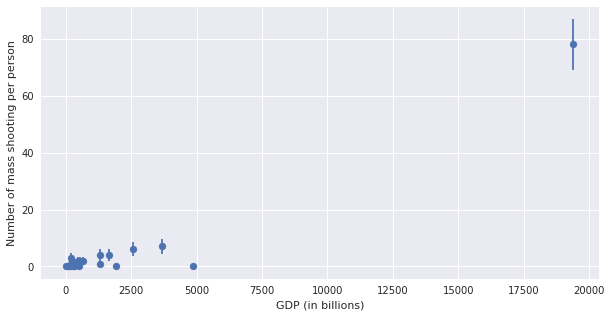

In [85]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.show()

Figure 1: Number of mass shooting vs GDP, errors represent Poisson statistics. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings.

## plot the average number of civilian fire arms per person

#### histogram

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


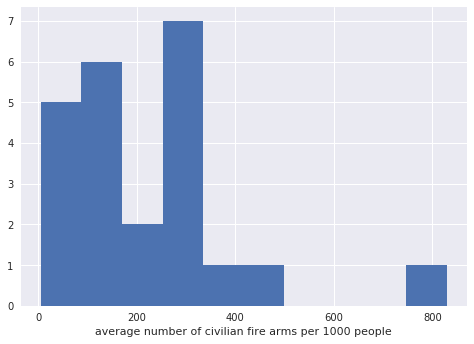

In [84]:
fig, ax = plt.subplots()
ax.hist(df['Average total all civilian firearms'] / df['pop'] * 1000)
ax.set_xlabel('average number of civilian fire arms per 1000 people');

Figure 2: The histogram(distribution) of averge number of civilian fire arms per 1000 people. The bar to the top right of the histogram is the USA, which has the highest average number of fire arms per 1000 people.

#### plot with errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


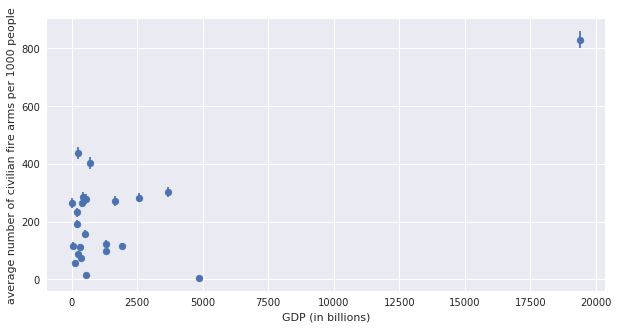

In [83]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Average total all civilian firearms'] / df['pop'] * 1000)
ax.errorbar(df.gdp / 1e9, df['Average total all civilian firearms'] / df['pop'] * 1000, 
            yerr = np.sqrt(df['Average total all civilian firearms'] / df['pop'] * 1000 * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of civilian fire arms per 1000 people")
ax.set_ylim()
plt.show()

Figure 3: The average number of civilian fire arms per 1000 people vs. GDP, errors represent Poisson statistics. The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest average number of civilian fire arms per 1000 people.

#### plot without errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


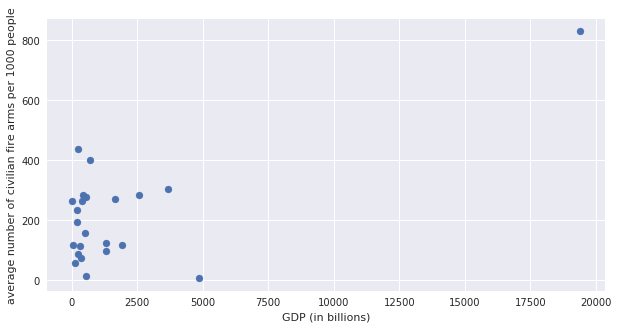

In [81]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Average total all civilian firearms'] / df['pop'] * 1000)
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of civilian fire arms per 1000 people")
ax.set_ylim()
plt.show()

Figure 4: The same plot as the Figure 3, but plotted without errors.

## plot the average number of homicide by fire arms per person

#### histogram

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


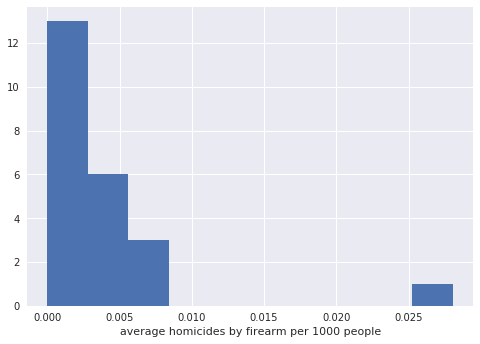

In [82]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df['pop'] * 1000)
ax.set_xlabel('average homicides by firearm per 1000 people');

Figure 5: The histogram(distribution) of average homicides by firearm per 1000 people. The bar to the top right of the histogram is the USA, which has the highest average homicides by firearm per 1000 people.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


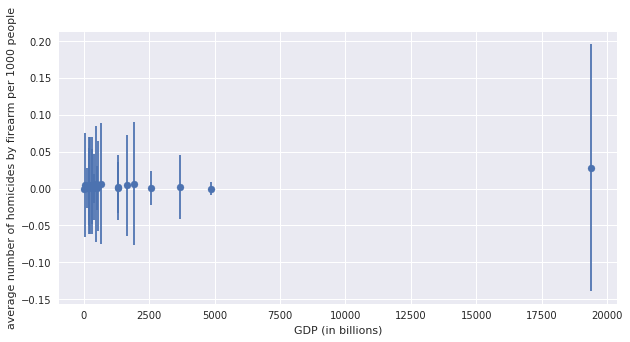

In [86]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000)
ax.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000, 
            yerr = np.sqrt(df['Number of homicides by firearm'] / df['pop'] * 1000 * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of homicides by firearm per 1000 people")
ax.set_ylim()
plt.show()

Figure 6: The average number of homicides by firearm per 1000 people vs. GDP, errors represent Poisson statistics. The datapoint to the right of the plot is the USA, which has the highest GDP and the highest average number of homicides by firearm per 1000 people.

## plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

#### plot with errors

In [108]:
ind = (df['Average total all civilian firearms'] < 50e6)
ind_2 = (df['Average total all civilian firearms'] > 50e6)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


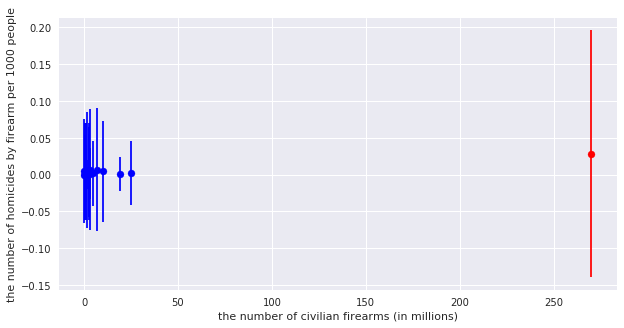

In [112]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'].loc[ind] / 1e6, 
                     df['Number of homicides by firearm'].loc[ind] / df['pop'].loc[ind] * 1000, color = 'blue' )
scatter = ax.scatter(df['Average total all civilian firearms'].loc[ind_2] / 1e6, 
                     df['Number of homicides by firearm'].loc[ind_2] / df['pop'].loc[ind_2] * 1000, color = 'red' )
ax.errorbar(df['Average total all civilian firearms'].loc[ind] / 1e6,
            df['Number of homicides by firearm'].loc[ind] / df['pop'].loc[ind] * 1000, 
            yerr = np.sqrt(df['Number of homicides by firearm'].loc[ind] / df['pop'].loc[ind] * 1000 * 1.0),
            color = 'blue', fmt = '.')
ax.errorbar(df['Average total all civilian firearms'].loc[ind_2] / 1e6,
            df['Number of homicides by firearm'].loc[ind_2] / df['pop'].loc[ind_2] * 1000, 
            yerr = np.sqrt(df['Number of homicides by firearm'].loc[ind_2] / df['pop'].loc[ind_2] * 1000 * 1.0),
            color = 'red', fmt = '.')
ax.set_xlabel("the number of civilian firearms (in millions)")
ax.set_ylabel("the number of homicides by firearm per 1000 people")
ax.set_ylim()
plt.show()

Figure 7: The number of homicides by firearm per 1000 people vs. the number of civilian firearms (in millions), errors represent Poisson statistics. The datapoint to the right of the plot is the USA, which has the highest number of civilian firearms and the highest number of homicides by firearm per 1000 people.

#### plot without errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


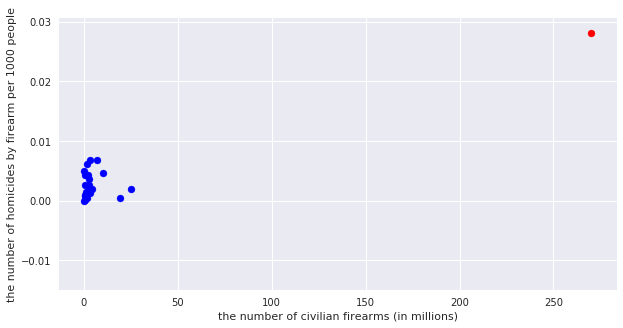

In [121]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'].loc[ind] / 1e6, 
                     df['Number of homicides by firearm'].loc[ind] / df['pop'].loc[ind] * 1000, color = 'blue' )
scatter = ax.scatter(df['Average total all civilian firearms'].loc[ind_2] / 1e6, 
                     df['Number of homicides by firearm'].loc[ind_2] / df['pop'].loc[ind_2] * 1000, color = 'red' )
ax.set_xlabel("the number of civilian firearms (in millions)")
ax.set_ylabel("the number of homicides by firearm per 1000 people")
ax.set_ylim()
plt.show()

Figure 8: The same plot as the Figure 7, but plotted without errors.

## plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

#### plot with errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


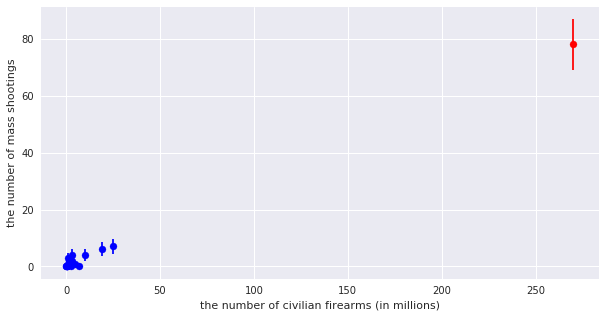

In [115]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'].loc[ind] / 1e6, 
                     df['Number of mass shootings'].loc[ind] , color = 'blue' )
scatter = ax.scatter(df['Average total all civilian firearms'].loc[ind_2] / 1e6, 
                     df['Number of mass shootings'].loc[ind_2] , color = 'red' )
ax.errorbar(df['Average total all civilian firearms'].loc[ind] / 1e6,
            df['Number of mass shootings'].loc[ind] , 
            yerr = np.sqrt(df['Number of mass shootings'].loc[ind]  * 1.0),
            color = 'blue', fmt = '.')
ax.errorbar(df['Average total all civilian firearms'].loc[ind_2] / 1e6,
            df['Number of mass shootings'].loc[ind_2] , 
            yerr = np.sqrt(df['Number of mass shootings'].loc[ind_2]  * 1.0),
            color = 'red', fmt = '.')
ax.set_xlabel("the number of civilian firearms (in millions)")
ax.set_ylabel("the number of mass shootings")
ax.set_ylim()
plt.show()

Figure 9: The number of mass shootings vs. the number of civilian firearms (in millions), errors represent Poisson statistics. The datapoint to the right of the plot is the USA, which has the highest number of civilian firearms and the highest number of mass shootings.

#### plot without errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


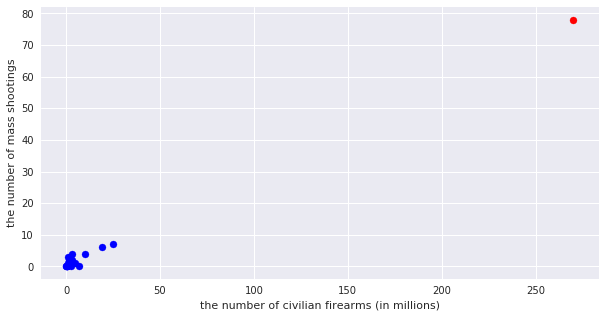

In [122]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'].loc[ind] / 1e6, 
                     df['Number of mass shootings'].loc[ind] , color = 'blue' )
scatter = ax.scatter(df['Average total all civilian firearms'].loc[ind_2] / 1e6, 
                     df['Number of mass shootings'].loc[ind_2] , color = 'red' )
ax.set_xlabel("the number of civilian firearms (in millions)")
ax.set_ylabel("the number of mass shootings")
ax.set_ylim()
plt.show()

Figure 10: The same plot as the Figure 7, but plotted without errors.

## Modeling

## fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person

In [145]:
#remove the outlier for the sake of model and its visualization
df_norm = df.loc[ind]

In [146]:
#normalizing by dividing the mean
df_norm.iloc[:,1:] = df_norm.iloc[:,1:] / df_norm.iloc[:,1:].mean()
df_norm.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
0,Australia,0.744935,0.933598,1.313637,0.514419,0.720052,2.444444
1,Austria,0.610602,0.334334,0.413516,0.308652,1.459306,0.611111
2,Belgium,0.439634,0.431602,0.489039,1.200312,0.825660,1.222222
3,Canada,2.430197,1.393174,1.640822,2.966485,1.478508,2.444444
4,Denmark,0.158757,0.218973,0.322470,0.257210,0.576042,0.000000


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


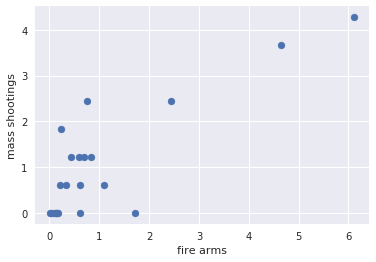

In [148]:
plt.scatter(df_norm['Average total all civilian firearms'], df_norm['Number of mass shootings'])
plt.xlabel("fire arms")
plt.ylabel("mass shootings")
plt.show()

Figure 11: mass shootings vs. fire arms in scatterplot

#### OLS, WLS

In [151]:
# OLS
X = sm.add_constant(df_norm['Average total all civilian firearms'])
x = df_norm['Average total all civilian firearms']
y = df_norm['Number of mass shootings']
smfit = smf.OLS(y, X).fit()

In [160]:
# WLS
X = sm.add_constant(df_norm['Average total all civilian firearms'])
x = df_norm['Average total all civilian firearms']
y = df_norm['Number of mass shootings']

errors = np.sqrt(y * 1.0)

wls_model = sm.WLS(y, X, weights= errors)
wls_fit = wls_model.fit()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


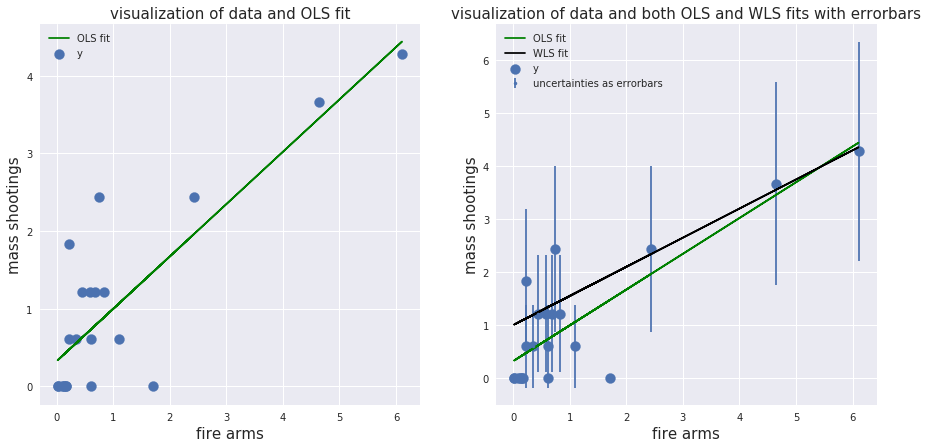

In [179]:
beta0_sm, beta1_sm = smfit.params
beta0_wls, beta1_wls = wls_fit.params

fig = plt.figure(figsize = (15,7))

ax = fig.add_subplot(121)
plt.scatter(x, y, s=100, label = 'y')
plt.plot(x, x * beta1_sm + beta0_sm, '-', color='green', label="OLS fit")
plt.title('visualization of data and OLS fit', fontsize=15)
plt.xlabel('fire arms', fontsize=15)
plt.ylabel('mass shootings', fontsize=15)
plt.legend(loc=2)

ax = fig.add_subplot(122)
plt.scatter(x, y, s=100, label = 'y')
plt.plot(x, x * beta1_sm + beta0_sm, '-', color='green', label="OLS fit")
plt.plot(x, x * beta1_wls + beta0_wls, '-', color='black', label="WLS fit")
ax.errorbar(x, y, yerr=errors, fmt='.', label = "uncertainties as errorbars")
plt.title('visualization of data and both OLS and WLS fits with errorbars', fontsize=15)
plt.xlabel('fire arms', fontsize=15)
plt.ylabel('mass shootings', fontsize=15)
plt.legend(loc=2)

plt.show()

Figure 12: (On the left) OLS fit for mass shootings vs. fire arms. (On the right) OLS and WLS fit with errorbars for mass shootings vs. fire arms.

#### Seaborn

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


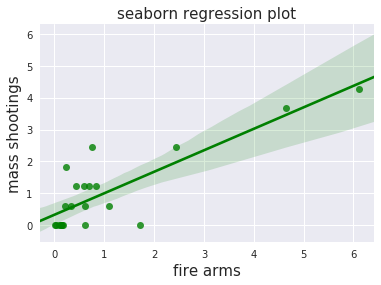

In [182]:
sns.regplot(x=x, y=y, color='g')
plt.title('seaborn regression plot', fontsize=15)
plt.xlabel('fire arms', fontsize=15)
plt.ylabel('mass shootings', fontsize=15)
plt.show()

Figure 13: Seaborn plot showing regression confidence intervals for mass shootings vs. fire arms.